### Importing modules (pandas, numpy, sklearn)

In [40]:
import pandas as pd #load and manipulate data
import numpy as np #calculate the mean and std dev
import matplotlib.pyplot as plt #visualize graphs


from sklearn.tree import DecisionTreeClassifier # build a classification tree
from sklearn.tree import plot_tree # draw a classification tree
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.model_selection import cross_val_score # cross validation
from sklearn.metrics import confusion_matrix # create confusion matrix
from sklearn.metrics import plot_confusion_matrix # draw confusion matrix

### Importing Heart Disease dataset 
from UCI.
The data set will allow us to predict if someone has heart disease based on their sex, age, blood pressure and variety of metrics

In [41]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
df = pd.read_csv(url)

In [42]:
df.head()

,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


Replacing column numbers with column names from UCI website.
* age
* sex
* cp(chest pain)
* restbp(resting bloodpressure in mmHg)
* chol(serum cholesterol in mg/dl)
* fbs(fasting blood sugar)
* restecg(resting electrocardiographic results)
* thalach(maximum heart rate achieved)
* exang (exercise induced angina)
* oldpeak (ST depression induced by exercise relative to rest
* slop (the slope of the peak exercise ST segment
* ca (number of major vessels (0-3) colored by fluroscopy
* thal (short  of thamlium heart scan)
* hd (diagnosis of heart disease, the predicted attribute)

In [43]:
#changing the column numbers to column names
df.columns = ['age', 
           'sex', 
           'cp',
           'restbp',
           'chol', 
           'fbs', 
           'restecg',
           'thalach',
           'exang', 
           'oldpeak',
           'slope',
           'ca',
           'thal',
           'hd']
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


####  Identifying Missing Data
- can remove row for a missing row
- impute (educated guess of what the value should be ex: age, can  use avg. age)

In [44]:
#check data type for each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

'object' data type means there's mixed values such as numbers and letters

In [45]:
#check the values in columns
df['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0', '?'], dtype=object)

In [46]:
df['thal'].unique()

array(['3.0', '7.0', '6.0', '?'], dtype=object)

### Dealing with Missing Data

In [47]:
#print the number of rows containing missing values
#loc to specify which rows we want 

len(df.loc[(df['ca'] == '?')
| #logical or, bitwise or
(df['thal'] == '?')])

6

In [48]:
#look at the 6 rows with missing values

df.loc[(df['ca'] == '?')
| #logical or, bitwise or
(df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [49]:
#count the number of rows in the dataset
len(df)

302

so 6 of the 303 rows or 2%, contain missing values. Removie 6 out of the 303 is still plenty of data to build a classification tree. 
we remove the rows with missing values by selecting all the rows that do not contrain question marks in either the ca or thal columns

In [50]:
#loc to select all the rows that do not contain missing values and save them in a new df

df_no_missing = df.loc[(df['ca'] != '?')
                & 
                (df['thal'] != '?')]

In [51]:
len(df_no_missing)

296

In [52]:
df_no_missing['ca'].unique()

array(['3.0', '2.0', '0.0', '1.0'], dtype=object)

In [53]:
df_no_missing['thal'].unique()

array(['3.0', '7.0', '6.0'], dtype=object)

## Format Data part 1
Splitting data into dependent and independent variable:
1) The columns of data that we will use to make classifications (X)
2) The column of data that we want to predict (y)

In [54]:
#make a new copy of the columns used to make predictions
#copy the data by value. this ensures that the originial df_no_missing is not modified when X or y are modified

X = df_no_missing.drop('hd', axis=1).copy() #copy everything except for the hd column
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0


In [55]:
#make new copy of the column data we want to predict

y = df_no_missing['hd'].copy()
y.head()

0    2
1    1
2    0
3    0
4    0
Name: hd, dtype: int64

## Format the Data part 2

* age - float
* sex - category
* cp - category
* restbp - float
* chol - float
* fbs - category
* restecg - category
* thalach - float
* exang - category
* oldpeak - float
* slope - categroy
* ca - float
* thal - category

One-Hot Encoding 
* ColumnTransformer() (scikitlearn) and get_dummies(pandas)

In [56]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [57]:
X['cp'].unique()

array([4., 3., 2., 1.])

Becuase 'cp', 'restecg', 'slope', 'thal' are categorical variables, dummy variables will be created. 

In [58]:
pd.get_dummies(X, columns=['cp']).head()

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
1,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
3,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0,1,0,0


In [59]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                      'slope',
                                      'thal'])
X_encoded.head()

#because sex, fbs, and exang only have 2 categories and only contain 0s and 1s, we do not have to do anything to them, so we're dont formatting for the Classification Tree

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
1,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
2,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
3,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0
4,56.0,1.0,120.0,236.0,0.0,178.0,0.0,0.8,0.0,0,...,0,1,0,0,1,0,0,1,0,0


In [60]:
y.unique() #has 5 different levels of heart disease. 0 = no hd and 1-4 for various degrees of hd

###only going to be looking at if someone has heart disease or not so everything > 0 will be converted to 1

array([2, 1, 0, 3, 4], dtype=int64)

In [61]:
y_not_zero_index = y > 0 #get the index for each non-zero value in y
y[y_not_zero_index] = 1 #set non-zero values to 1
y.unique()

array([1, 0], dtype=int64)

## Building a Prelimindary Classification Tree

In [62]:
# split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

#create a decision tree and fir it to the training data
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

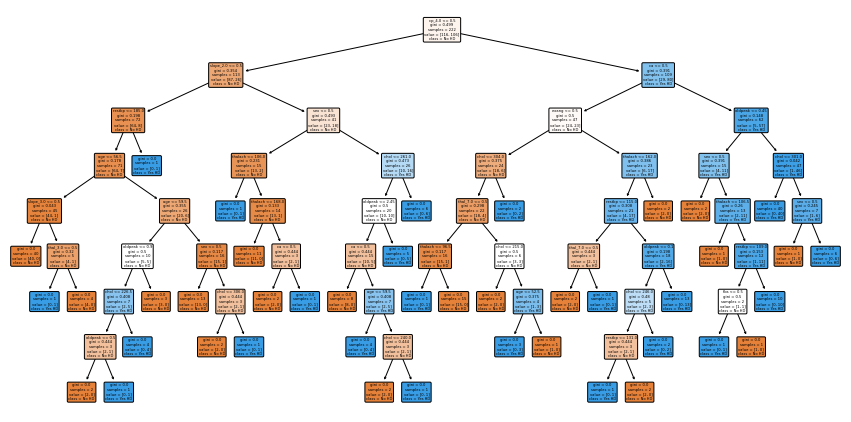

In [63]:
#we can plot the tree

plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt,
         filled=True,
         rounded=True,
         class_names=['No HD', 'Yes HD'],
         feature_names=X_encoded.columns);

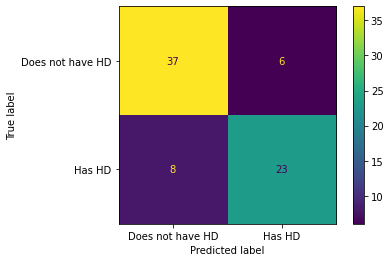

In [64]:
#plot_confusion_matrix() will run the test data down the tree and draw a confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=['Does not have HD', 'Has HD'])

In the confusion matrix, 37+6 = 43 does not have Heart Disease, 37 (86%) were correctly classified. Of the 8+23 = 29 that have Heart Disease, 23(74%) were correctly classified. Can we do better? may have **overfit** the training dataset

## Cost Complexity Pruning
Visualize alpha
- pruning a tree with cost complexity pruning can simplify the whole process of finding a smaller tree that improves the accuracy with the Testing Dataset.
- pruning a deciison tree is all about finding the right value for the pruning parameter, alpha, which controls how little or how much pruning happens. one way to find the optimal value for alpha is to plot the accuracy of the tree as a fxn of different values.

In [65]:
#how we extract values 
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values for alpha
ccp_alphas = ccp_alphas[:-1] #exclude the maximum value

clf_dts = [] #array where we will put decision trees

#create one decision tree per value for alpha and store in the array
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha) #create decision tree for each value
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

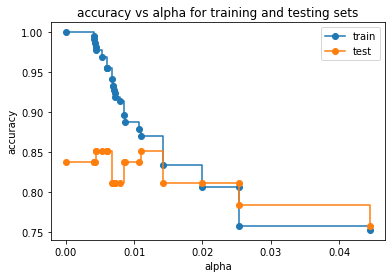

In [66]:
train_scores= [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()

ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker = 'o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label = 'test', drawstyle='steps-post')
ax.legend()
plt.show()

In the graph, we see that the accuracy for the **Testing Dataset** hit max value when alpha was
around .011. 

## Cost Complexity Pruning
Cross Validation for finding the best alpha
the graph drawn suggest multiple values for alpha. 

    *can do this in the beginning. 

<AxesSubplot:xlabel='tree'>

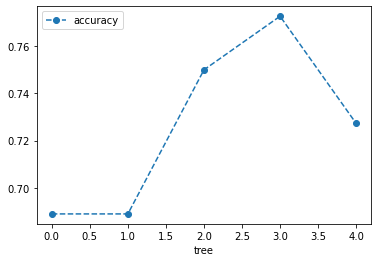

In [67]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.011) #create the tree with ccp_alpha=0.011

#use 5 fold cross validation create 5 different training and testing datasets that
#are then used to train and test the tree. 5 fold used becuase we don't have a lot of data
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy':scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

The shows that using different Traing and Testing data with same alpha resulted in different accuries suggesting that alpha is sensitive to the datasets. So, instead of pincking a single Training dataset and sing Testing dataset, let's use cross validation to find the optimal value for ccp_alpha

<AxesSubplot:xlabel='alpha'>

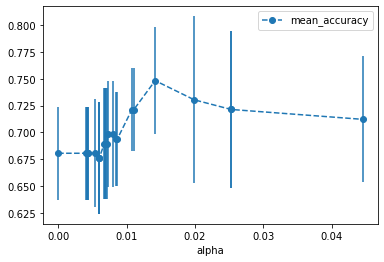

In [68]:
#create an array to store the results of each fold during cv
alpha_loop_values = []

#for each cadidiate value for alpha, we run 5fold cv
#then store the mean and std dev of the  scores (the accuracy) for each call to cross_val_score in alpha_loop_values

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
    
#draw graph of the means and stddev of the scores for each candidiate value for alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                           columns=['alpha','mean_accuracy', 'std'])

alpha_results.plot(x='alpha',
                  y='mean_accuracy',
                  yerr='std',
                  marker='o',
                  linestyle='--')

In [69]:
alpha_results[(alpha_results['alpha'] > 0.011)
              &
              (alpha_results['alpha'] < 0.014)]

,alpha,mean_accuracy,std
20,0.011057,0.721111,0.038831


In [70]:
#store ideal value for alpha
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.011)
                              &
                              (alpha_results['alpha'] < 0.014)]['alpha']

ideal_ccp_alpha

20    0.011057
Name: alpha, dtype: float64

In [71]:
#convert to float
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

#ideal value for alpha to build Classification Tree

0.011056511056511058

## Building, Evaluatin, Drawing and Intepreting the  Classification Tree

In [72]:
#build and train a new decision tree using the optimal value for alpha

clf_dt_pruned = DecisionTreeClassifier(random_state=42,
                                          ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)


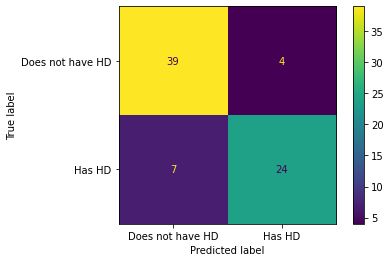

In [73]:
plot_confusion_matrix(clf_dt_pruned,
                     X_test,
                     y_test,
                     display_labels=['Does not have HD', 'Has HD'])

In the confusion matrix, 39+4 = 43 does not have Heart Disease, 39 (91%) were correctly classified. An improve from the full sized tree which only had 37 (86%) correctly classified without heart disease.  Of the 7+24 = 31 that have Heart Disease, 24(77%) were correctly classified. An improvement from the full sized tree which classified 23 (74%) having heart disease 

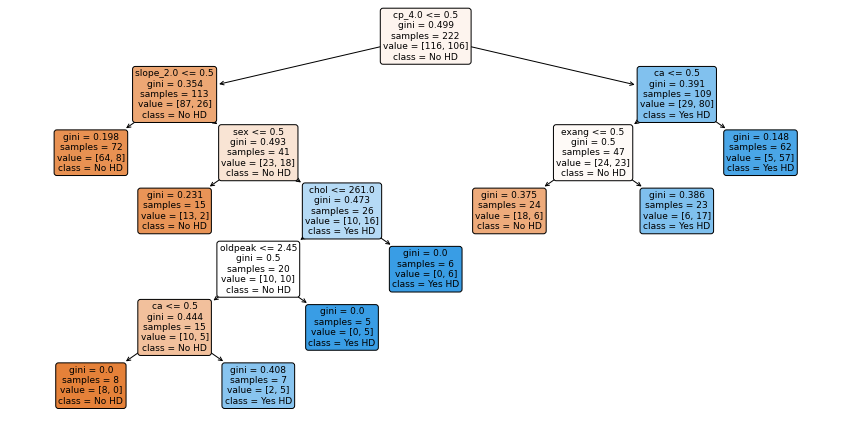

In [74]:
#draw pruned tree

plt.figure(figsize=(15, 7.5))
plot_tree(clf_dt_pruned,
         filled=True,
         rounded=True,
         class_names=['No HD', 'Yes HD'],
         feature_names=X_encoded.columns);

- If false go to the right
- orange majority 'no HD', blue majority 'yes HD'
- darker color the lower the gini impurity, the better the classification 